In [2]:
from _3D_LungSegmentation_Threshold import get_segmented_lungs
from _3D_CT_Preprocess import preprocessScan
from _3D_CT_Preprocess import getScan
from _3D_CT_Preprocess import normalizeScan
from _3D_CT_Preprocess import resizeScan
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import matplotlib.pyplot as plt

In [ ]:
#Test

In [3]:
lung = getScan("/Users/phoenixji/Desktop/LungData/LUNA16/AllSet/1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437.mhd")

In [11]:
lungMask = getScan("/Users/phoenixji/Desktop/LungData/seg-lungs-LUNA16/1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437.mhd")

In [12]:
lungMask.shape

(117, 512, 512)

In [17]:
lungMask = np.where(lungMask==0,lungMask,1)

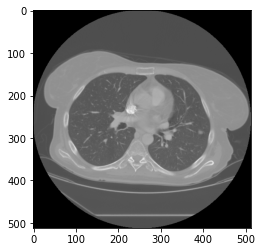

In [18]:
plt.imshow(lung[70],cmap='gray')

In [9]:
mask = get_segmented_lungs(lung[70])

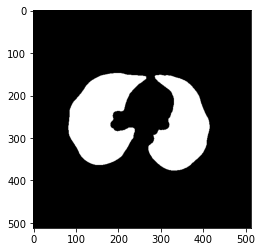

In [10]:
plt.imshow(mask,cmap='gray')

In [24]:
def IoU(y_true, y_pred):
   # assert y_true.dtype == bool and y_pred.dtype == bool
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.logical_and(y_true_f, y_pred_f).sum()
    union = np.logical_or(y_true_f, y_pred_f).sum()
    return (intersection + 1) * 1. / (union + 1)

In [31]:
def Dice(y_true, y_pred):
    #assert y_true.dtype == bool and y_pred.dtype == bool
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.logical_and(y_true_f, y_pred_f).sum()
    return (2. * intersection + 1.) / (y_true.sum() + y_pred.sum() + 1.)

In [32]:
IoU(lungMask[70], mask)

0.9324436321907474

In [33]:
Dice(lungMask[70], mask)

0.9650405788813865

#  Prepare 3D Infection Segmentation Data for U-Net

# For dataset 1

In [372]:
CT_Scan=[]
Lung_Mask=[]

In [373]:
CovidScan = []
InfectionMask = []

In [374]:
CovidScan_Path = "/Users/phoenixji/Desktop/LungData/Covid-DirectSeg-Data/MosMedSeg/CT_Original/"
CovidScan_List = os.listdir(CovidScan_Path)
Mask_Path = '/Users/phoenixji/Desktop/LungData/Covid-DirectSeg-Data/MosMedSeg/masks/'
Mask_List = os.listdir(Mask_Path)

In [ ]:
for x in Mask_List:
    print(x)

In [376]:
Mask_List.remove('.DS_Store.nii.gz')
Mask_List.remove('.DS_Store')

In [377]:
len(CovidScan_List),len(Mask_List)

(50, 50)

In [ ]:
for Scan_ in CovidScan_List:
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path+Scan_)
    #lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    #scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    #scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)

    
    # Add the infectious area mask to area
    scan = getScan(Mask_Path+Scan_)
    print("Before Resize mask"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
#     scan = np.expand_dims(scan,axis=-1)
    print("After Resize mask"+str(scan.shape))
    InfectionMask.append(scan)

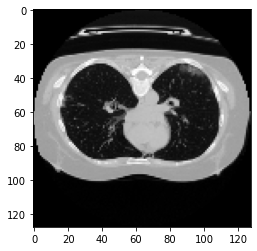

In [379]:
plt.imshow(CovidScan[4][:,:,32],cmap='gray')

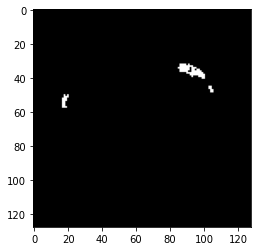

In [380]:
plt.imshow(InfectionMask[4][:,:,32],cmap='gray')

In [381]:
len(CovidScan),len(InfectionMask)

(50, 50)

In [382]:
np.unique(np.array(InfectionMask))

array([0, 1], dtype=int16)

# For datset 2

In [383]:
CovidScan_Path = "/Users/phoenixji/Desktop/LungData/Covid-DirectSeg-Data/RP_Data/rp_im/"
CovidScan_List = os.listdir(CovidScan_Path)
Mask_Path = '/Users/phoenixji/Desktop/LungData/Covid-DirectSeg-Data/RP_Data/rp_mask/'
Mask_List = os.listdir(Mask_Path)

In [384]:
len(CovidScan_List),len(Mask_List)

(9, 9)

In [ ]:
for Scan_ in CovidScan_List:
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path+Scan_)
    #lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    #scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    #scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)

    
    # Add the infectious area mask to area
    scan = getScan(Mask_Path+Scan_)
    print("Before Resize mask"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
#     scan = np.expand_dims(scan,axis=-1)
    scan = np.where(scan==0,scan,1)
    
    print("After Resize mask"+str(scan.shape))
    InfectionMask.append(scan)

In [386]:
np.unique(np.array(InfectionMask))

array([0, 1], dtype=int32)

In [387]:
len(CovidScan),len(InfectionMask)

(59, 59)

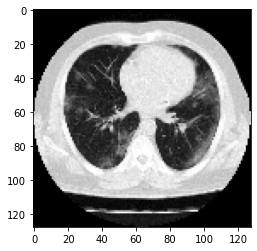

In [389]:
plt.imshow(CovidScan[55][:,:,28],cmap='gray')

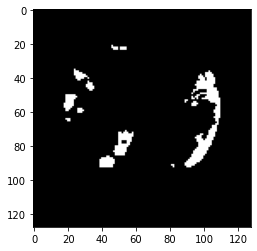

In [390]:
plt.imshow(InfectionMask[55][:,:,28],cmap='gray')

# For dataset 3

In [391]:
CovidScan_Path = "/Users/phoenixji/Desktop/LungData/Covid-DirectSeg-Data/Zenodo Data/COVID-19-CT-Seg_20cases/"
CovidScan_List = os.listdir(CovidScan_Path)
Mask_Path = '/Users/phoenixji/Desktop/LungData/Covid-DirectSeg-Data/Zenodo Data/Infection_Mask/'
Mask_List = os.listdir(Mask_Path)

In [392]:
len(CovidScan_List),len(Mask_List)

(20, 20)

In [ ]:
for Scan_ in CovidScan_List:
    
    # Add the lung segmented CT to area
    scan = getScan(CovidScan_Path+Scan_)
    #lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    #scan[~lungMask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
    #scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)

    
    # Add the infectious area mask to area
    scan = getScan(Mask_Path+Scan_)
    print("Before Resize mask"+str(scan.shape))
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
        
    scan = resizeScan(scan,(128,128,64))
#     scan = np.expand_dims(scan,axis=-1)
    scan = np.where(scan==0,scan,1)
    
    print("After Resize mask"+str(scan.shape))
    InfectionMask.append(scan)

In [394]:
len(CovidScan),len(InfectionMask)

(79, 79)

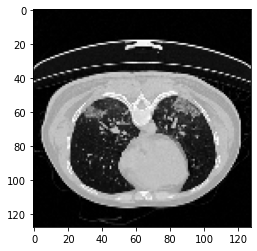

In [395]:
plt.imshow(CovidScan[77][:,:,25],cmap='gray')

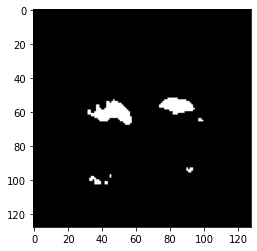

In [396]:
plt.imshow(InfectionMask[77][:,:,28],cmap='gray')

In [397]:
from sklearn.model_selection import train_test_split

In [398]:
X_train, X_test, y_train, y_test = train_test_split(np.array(CovidScan), np.array(InfectionMask), 
                                                    test_size = 0.1, random_state = 0,shuffle=True)

In [399]:
X_train.shape

(71, 128, 128, 64)

In [400]:
# Do lung seg first and do infectious area by later Unet

In [401]:
np.save('X_train_3D_LungSeg_InfSeg',X_train)
np.save('y_train_3D_LungSeg_InfSeg',y_train)
np.save('X_test_3D_LungSeg_InfSeg',X_test)
np.save('y_test_3D_LungSeg_InfSeg',y_test)